In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy.linalg as LA

sklearn.decomposition.PCA is documented at https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [61]:
from sklearn.decomposition import PCA

Generate an elliptically shaped random cloud in the plane

In [83]:
from numpy.random import multivariate_normal as MVN

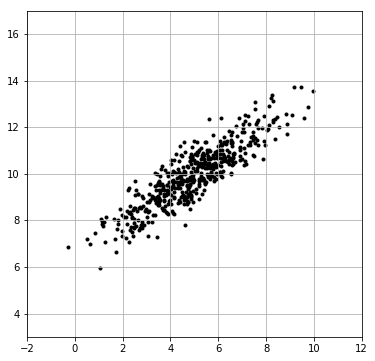

In [205]:
mu=np.array([5,10])
sigma=np.array([[3,2],[2, 1.7]])
X=MVN(mu, sigma, 500)
plt.scatter(X[:,0],X[:,1],marker=".",c="k")
plt.xlim([-2,12])
plt.ylim([3,17])
plt.grid()
fig=plt.gcf()
fig.set_size_inches(6,6)

## Find the principal components of the Gaussian cloud

In [206]:
pca=PCA(n_components=2)
pca.fit(X)
V=pca.components_
print(V)

[[ 0.8068687   0.59073082]
 [-0.59073082  0.8068687 ]]


In [207]:
print(pca.explained_variance_ratio_)  

[0.94590726 0.05409274]


In [214]:
for component, fraction in zip(pca.components_,pca.explained_variance_ratio_):
    print(round(100*fraction,5),"percent:", component)

94.59073 percent: [0.8068687  0.59073082]
5.40927 percent: [-0.59073082  0.8068687 ]


## Transform the cloud to coordinates given by its principal components

## Note that it is now centered at the origin

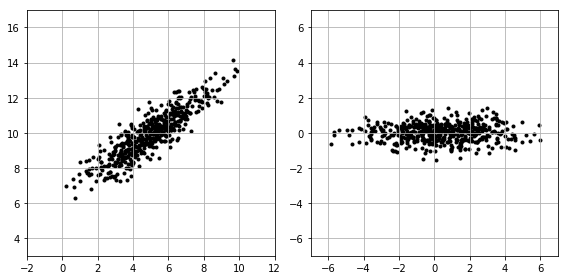

In [119]:
P=pca.transform(X)
fig,ax=plt.subplots(nrows=1,ncols=2)

ax[0].scatter(X[:,0],X[:,1],marker=".",c="k")
ax[0].set_xlim([-2,12])
ax[0].set_ylim([3,17])
ax[0].grid()

ax[1].scatter(P[:,0],P[:,1],marker=".",c="k")
ax[1].set_xlim([-7,7])
ax[1].set_ylim([-7,7])
ax[1].grid()

fig.set_size_inches(8,4)
fig.tight_layout()
fig.savefig("PCA-2D-elliptical-gaussian.pdf")

## Car Data

In [216]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                 header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)
print(data[:5])

    mpg  cyl  displ     hp  weight  accel  model  origin  \
0  18.0    8  307.0  130.0  3504.0   12.0     70       1   
1  15.0    8  350.0  165.0  3693.0   11.5     70       1   
2  18.0    8  318.0  150.0  3436.0   11.0     70       1   
3  16.0    8  304.0  150.0  3433.0   12.0     70       1   
4  17.0    8  302.0  140.0  3449.0   10.5     70       1   

                       carname  
0  "chevrolet chevelle malibu"  
1          "buick skylark 320"  
2         "plymouth satellite"  
3              "amc rebel sst"  
4                "ford torino"  


In [217]:
cars=np.array(data[["cyl","mpg","displ","hp","weight","accel"]])
cars=np.array([line for line in cars if line[0] in [4,6,8]])
Y=cars[:,0]/2-2
X=cars[:,1:]
#Y=np.array(data["mpg"])


In [218]:
X[:3], Y[:3]

(array([[  18. ,  307. ,  130. , 3504. ,   12. ],
        [  15. ,  350. ,  165. , 3693. ,   11.5],
        [  18. ,  318. ,  150. , 3436. ,   11. ]]), array([2., 2., 2.]))

In [220]:
np.round(np.corrcoef(X,rowvar=False),3)

array([[ 1.   , -0.818, -0.78 , -0.843,  0.419],
       [-0.818,  1.   ,  0.903,  0.935, -0.561],
       [-0.78 ,  0.903,  1.   ,  0.869, -0.692],
       [-0.843,  0.935,  0.869,  1.   , -0.431],
       [ 0.419, -0.561, -0.692, -0.431,  1.   ]])

In [222]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
comps=pca.components_
explain=pca.explained_variance_ratio_
for comp, frac in zip(comps,explain):
    print(round(100*frac,5),"percent:", comp)

99.76511 percent: [-0.0076786   0.11404841  0.03920751  0.99267056 -0.00138875]
0.19845 percent: [-0.01797915  0.94308579  0.30724002 -0.1206763  -0.03614883]


In [162]:
P=pca.transform(X)

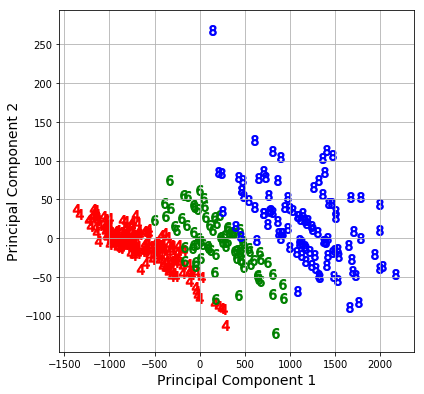

In [164]:
colors=["red", "green","blue"]
markers=["$4$","$6$","$8$"]

xvals=P[:,0]
yvals=P[:,1]

nclasses=3
for i in range(nclasses):
    xyvals=[(x,y) for (x,y,theclass) in zip(xvals,yvals,Y) if theclass==i]
    x,y=zip(*xyvals)
    plt.scatter(x,y,marker=markers[i],color=colors[i],s=100)

plt.xlabel("Principal Component 1",fontsize=14)
plt.ylabel("Principal Component 2",fontsize=14)
#plt.ylim([7.5,25])
plt.grid()
fig=plt.gcf()
fig.tight_layout()
fig.set_size_inches(6,6)

In [177]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=4)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA=QuadraticDiscriminantAnalysis()
XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(P,Y,test_size=.25)

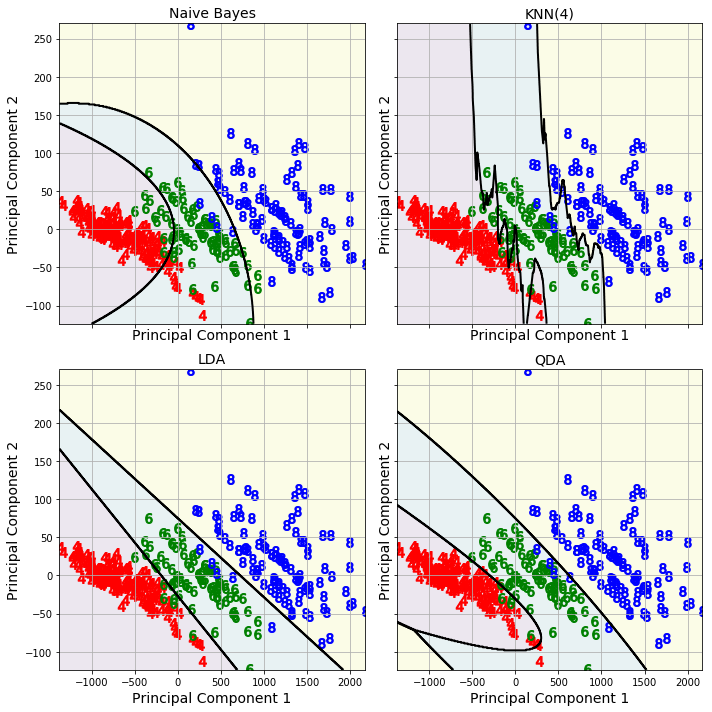

In [204]:
def visualize_PC(ax,clf,X,Y,DX,DY,thelevels,colors,markers,xlab="X",
                                ylab="Y", axtitle="Classification Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, DX),
                     np.arange(y_min, y_max, DY))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    c=ax.contour(xx, yy, Z, alpha=1,levels=thelevels,linewidths=2,colors="k")
    c=ax.contourf(xx, yy, Z, alpha=.1)
        
    nclasses=len(colors)
    for i in range(nclasses):
        xyvals=[(x,y) for (x,y,theclass) in zip(X[:,0],X[:,1],Y) if theclass==i]
        x,y=zip(*xyvals)
        ax.scatter(x,y,marker=markers[i],color=colors[i],s=100)


    ax.set_xlabel(xlab,fontsize=14)
    ax.set_ylabel(ylab,fontsize=14)
    ax.set_title(axtitle,fontsize=14)
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
    ax.grid()
    return(ax)
    
colors=["red", "green","blue"]
markers=["$4$","$6$","$8$"]

fig,ax=plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True)
gnb.fit(XTRAIN,YTRAIN)
KNN.fit(XTRAIN,YTRAIN)
LDA.fit(XTRAIN,YTRAIN)
QDA.fit(XTRAIN,YTRAIN)
visualize_PC(ax[0,0],gnb, P,Y,1, 1,[0.5,1.5],colors,markers,xlab="Principal Component 1",
            ylab="Principal Component 2",axtitle="Naive Bayes")
visualize_PC(ax[0,1],KNN, P,Y,1, 1,[0.5,1.5],colors,markers,xlab="Principal Component 1",
            ylab="Principal Component 2",axtitle="KNN(4)")
visualize_PC(ax[1,0],LDA, P,Y,1, 1,[0.5,1.5],colors,markers,xlab="Principal Component 1",
            ylab="Principal Component 2",axtitle="LDA")
visualize_PC(ax[1,1],QDA, P,Y,1, 1,[0.5,1.5],colors,markers,xlab="Principal Component 1",
            ylab="Principal Component 2",axtitle="QDA")

fig.set_size_inches(10,10)
fig.tight_layout()
fig.savefig("comparison-of-classifiers-decision-boundary.pdf")

#visualize_clasifier_contours(gnb,X,Y,.1,.1, [0.5,1.5],colors,markers,"MPG","Acceleration")

In [200]:
from sklearn.metrics import accuracy_score
YPGNB=gnb.predict(XTEST)
YPKNN=KNN.predict(XTEST)
YPLDA=LDA.predict(XTEST)
YPQDA=QDA.predict(XTEST)
print("accuracy (GNB) = ",accuracy_score(YTEST,YPGNB))
print("accuracy (KNN) = ",accuracy_score(YTEST,YPKNN))
print("accuracy (LDA) = ",accuracy_score(YTEST,YPLDA))
print("accuracy (QDA) = ",accuracy_score(YTEST,YPQDA))

accuracy (GNB) =  0.9175257731958762
accuracy (KNN) =  0.9381443298969072
accuracy (LDA) =  0.979381443298969
accuracy (QDA) =  0.9690721649484536


## Image Compression Example

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

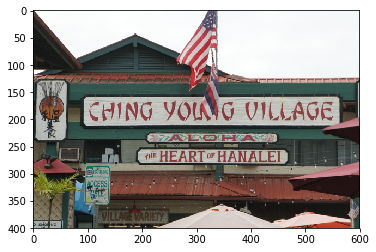

In [9]:
g=Image.open("../../BUILDING.JPG")
plt.imshow(g)

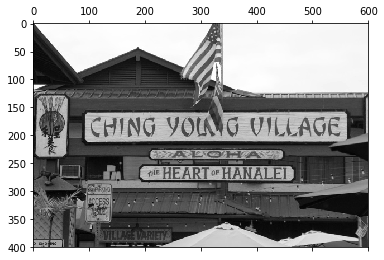

In [68]:
G=g.convert("L")
A=np.asarray(G)
plt.matshow(A,cmap="gray")

In [19]:
U,Sigma,V=np.linalg.svd(A)

In [110]:
UT=U.T; 

In [117]:
def PC(n):
    M=np.zeros_like(A).astype(float)
    for j in range(n):
        B=np.outer(UT[j], V[j])*Sigma[j]
        M+=B
    return(M)

In [118]:
PC400=PC(400)
PC200=PC(200)
PC100=PC(100)
PC50=PC(50)
PC40=PC(40)
PC30=PC(30)
PC20=PC(20)
PC10=PC(10)
PC5=PC(5)

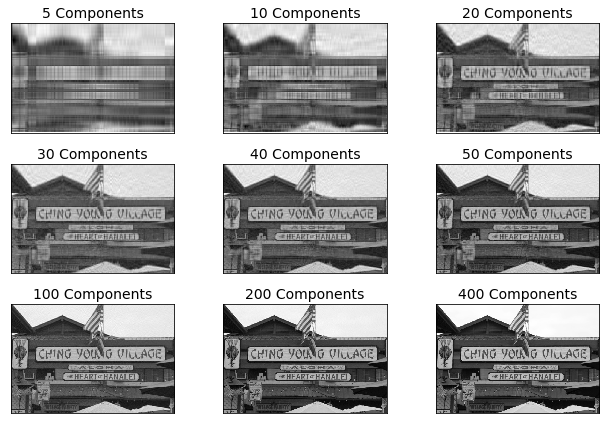

In [119]:
fig,ax=plt.subplots(nrows=3,ncols=3)
for row in range(3):
    for col in range(3):
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
ax[0][0].imshow(PC5,cmap="gray")
ax[0][0].set_title("5 Components",fontsize=14)
ax[0][1].imshow(PC10,cmap="gray")
ax[0][1].set_title("10 Components",fontsize=14)
ax[0][2].imshow(PC20,cmap="gray")
ax[0][2].set_title("20 Components",fontsize=14)

ax[1][0].imshow(PC30,cmap="gray")
ax[1][0].set_title("30 Components",fontsize=14)

ax[1][1].imshow(PC40,cmap="gray")
ax[1][1].set_title("40 Components",fontsize=14)

ax[1][2].imshow(PC50,cmap="gray")
ax[1][2].set_title("50 Components",fontsize=14)

ax[2][0].imshow(PC100,cmap="gray")
ax[2][0].set_title("100 Components",fontsize=14)

ax[2][1].imshow(PC200,cmap="gray")
ax[2][1].set_title("200 Components",fontsize=14)

ax[2][2].imshow(PC400,cmap="gray")
ax[2][2].set_title("400 Components",fontsize=14)

fig.set_size_inches(9,6)
fig.tight_layout()
fig.savefig("ching-young-village-pca.pdf")

In [74]:
len(V)

600

In [75]:
PC400.size

240000

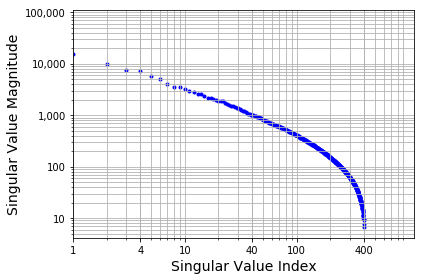

In [103]:
plt.scatter(range(len(Sigma)), Sigma, color="blue",marker=".")
plt.yscale("log")
plt.xscale("log")
plt.xticks([1,4,10,40,100,400],[1,4,10,40,100,400])
plt.yticks([10,100,1000,10000,100000],[10,100,"1,000","10,000","100,000"])
plt.grid(which="both")
plt.ylabel("Singular Value Magnitude",fontsize=14)
plt.xlabel("Singular Value Index",fontsize=14)
fig=plt.gcf()
fig.tight_layout()
fig.savefig("singular-value-vs-index-for-image-hanalei.pdf")

In [109]:
A.shape

(400, 600)